# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
import scipy
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import chart_studio.plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from scipy.sparse import hstack,vstack
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from prettytable import PrettyTable
from sklearn.preprocessing import Normalizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pdb

## 1.1 Reading Data

In [0]:
Project_data = pd.read_csv('train_data_50K.csv')
Resource_data = pd.read_csv('resources.csv')
#Bk=Project_data
#print(Bk.shape)
print(Project_data.shape)
print(Resource_data.shape)

(50000, 17)
(1541272, 4)


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(Project_data.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
Project_data['Date'] = pd.to_datetime(Project_data['project_submitted_datetime'])
Project_data.drop('project_submitted_datetime', axis=1, inplace=True)
Project_data.sort_values(by=['Date'], inplace=True)
# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
Project_data = Project_data[cols]
Project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
31477,47750,p185738,3afe10b996b7646d8641985a4b4b570d,Mrs.,UT,2016-01-05 01:05:00,Grades PreK-2,Math & Science,Mathematics,Math is Fun!,"\""The only way to learn mathematics is to do m...",My students love coming to school and working ...,My students will be using these math manipulat...,Learning about money is important so the stude...,"My students need base ten blocks, realistic pl...",0,1
40132,91045,p161351,40c9c33254a39827d6908ae9a6103c04,Teacher,CA,2016-01-05 01:59:00,Grades PreK-2,Special Needs,Special Needs,Wobbly Seats for Wiggly Firsties: Alternative ...,I have a classroom filled with 26 adorable bou...,"Some students learn best when standing, others...",The Kids Kore Wobble Seats will allow my stude...,Having the Kids Kore Wobble Chairs in my class...,My students need alternative seating because s...,0,1


## 1.2 preprocessing of `project_subject_categories`

In [0]:
y = Project_data['project_is_approved'].values
# Project_data.drop(['project_is_approved'], axis=1, inplace=True)
lpd = len(Project_data)
ys = np.zeros(lpd, dtype=np.int32)
X = Project_data

In [0]:
#Spliting the Dataset into three Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=ys)
print('Shape of the X_Train data is {0} and Y_Train data is: {1}'.format(X_Train.shape,Y_Train.shape[0]))
print('Shape of the X_Test data is  {0} and Y_Test data is : {1}'.format(X_Test.shape,Y_Test.shape[0]))

Shape of the X_Train data is (33500, 17) and Y_Train data is: 33500
Shape of the X_Test data is  (16500, 17) and Y_Test data is : 16500


In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

#****************************************************************Train Data********************************************************************************************
catogories = list(X_Train['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_Train['clean_categories'] = cat_list
X_Train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_Train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict_Train = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(len(sorted_cat_dict_Train))

#****************************************************************Test Data********************************************************************************************
catogories = list(X_Test['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_Test['clean_categories'] = cat_list
X_Test.drop(['project_subject_categories'], axis=1, inplace=True)


9


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
#****************************************************************Train Data********************************************************************************************
sub_catogories = list(X_Train['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_Train['clean_subcategories'] = sub_cat_list
X_Train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_Train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict_Train = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
print(len(sorted_sub_cat_dict_Train))

#****************************************************************Test Data********************************************************************************************
sub_catogories = list(X_Test['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_Test['clean_subcategories'] = sub_cat_list
X_Test.drop(['project_subject_subcategories'], axis=1, inplace=True)

30


## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
X_Train["essay"] = X_Train["project_essay_1"].map(str) +\
                        X_Train["project_essay_2"].map(str) + \
                        X_Train["project_essay_3"].map(str) + \
                        X_Train["project_essay_4"].map(str)


X_Test["essay"] = X_Test["project_essay_1"].map(str) +\
                        X_Test["project_essay_2"].map(str) + \
                        X_Test["project_essay_3"].map(str) + \
                        X_Test["project_essay_4"].map(str)

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
# tqdm is for printing the status bar

#----------------------------------PreProcessing of Essays in Train data set------------------------------------------------
preprocessed_essays_Train = []
for sentance in tqdm(X_Train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Train.append(sent.lower().strip())
# pdb.set_trace()

#----------------------------------PreProcessing of Essays in Test data set--------------------------------------------------
preprocessed_essays_Test = []
for sentance in tqdm(X_Test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Test.append(sent.lower().strip())
# pdb.set_trace()

100%|██████████| 16500/16500 [00:08<00:00, 1834.83it/s]


In [0]:
word_count_essay_Train = []
for a in tqdm(X_Train["essay"]) :
    b = len(a.split())
    word_count_essay_Train.append(b)

X_Train["word_count_essay_Train"] = word_count_essay_Train


word_count_essay_Test = []
for a in tqdm(X_Test["essay"]) :
    b = len(a.split())
    word_count_essay_Test.append(b)

X_Test["word_count_essay_Test"] = word_count_essay_Test

100%|██████████| 16500/16500 [00:00<00:00, 65650.70it/s]


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# Combining all the above stundents 
# tqdm is for printing the status bar

#----------------------------------PreProcessing of Project Title in Train data set-----------------------------------------
preprocessed_titles_Train = []
for sentance in tqdm(X_Train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_Train.append(sent.lower().strip())
# pdb.set_trace()

#----------------------------------PreProcessing of Project Title in Test data set------------------------------------------
preprocessed_titles_Test = []
for sentance in tqdm(X_Test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_Test.append(sent.lower().strip())
# pdb.set_trace()

100%|██████████| 16500/16500 [00:00<00:00, 42023.42it/s]


In [0]:
word_count_title_Train = []
for a in tqdm(X_Train["project_title"]) :
    b = len(a.split())
    word_count_title_Train.append(b)

X_Train["word_count_title_Train"] = word_count_title_Train

word_count_title_Test = []
for a in tqdm(X_Test["project_title"]) :
    b = len(a.split())
    word_count_title_Test.append(b)

X_Test["word_count_title_Test"] = word_count_title_Test

100%|██████████| 16500/16500 [00:00<00:00, 835306.95it/s]


## 1.5 Preparing data for models

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
def ResponseCoding(Train,Test,Column_Name):
  
  Unique_Category = Train[Column_Name].unique()
  Accept=[]
  Reject=[]
  Prob_Accept=[]
  Prob_Reject=[]
  Net=[]

  for i in Unique_Category:
    Accept.append((len(Train.loc[(Train[Column_Name] == i) & (Train['project_is_approved'] == 1)])))
    
  for i in Unique_Category: 
    Reject.append((len(Train.loc[(Train[Column_Name] == i) & (Train['project_is_approved'] == 0)])))
    
  for i in range(len(Accept)):
    try:
      Prob_Accept.append(Accept[i]/(Accept[i]+Reject[i]))
    except ZeroDivisionError:
      Prob_Accept.append(0)

  for i in range(len(Reject)):
    try:
      Prob_Reject.append(Reject[i]/(Accept[i]+Reject[i]))
    except ZeroDivisionError:
      Prob_Reject.append(0)    
  Prob_Accept_dict = dict(zip(Unique_Category, Prob_Accept)) 
  Prob_Reject_dict = dict(zip(Unique_Category, Prob_Reject)) 
  acc=Column_Name+'_accept'
  rej=Column_Name+'_reject'
  df = pd.DataFrame()
  df[acc] = Train[Column_Name].map(Prob_Accept_dict)
  df[rej] = Train[Column_Name].map(Prob_Reject_dict)
  acce_Train = df[acc].values.tolist()
  reje_Train = df[rej].values.tolist()
  Train_R = pd.DataFrame(list(zip(acce_Train, reje_Train)))
  #--------------------------------------------------------Test-----------------------------------------------------------------------------------------
  df1 = pd.DataFrame()
  df1[acc] = Test[Column_Name].map(Prob_Accept_dict)
  df1[rej] = Test[Column_Name].map(Prob_Reject_dict)
  acce_Test = df1[acc].values.tolist()
  reje_Test = df1[rej].values.tolist()
  Test_R = pd.DataFrame(list(zip(acce_Test, reje_Test)))
  Test_R.fillna(0.5, inplace = True)  #Filling the unseen values with 0.5 values.
  return Train_R,Test_R


**project_subject_categories,project_subject_subcategories, School State, Prefix, project_grade_category**

In [0]:
X_Train_clean_cat_raw,X_Test_clean_cat_raw=ResponseCoding(X_Train,X_Test,'clean_categories')
X_Train_clean_subcat_raw,X_Test_clean_subcat_raw=ResponseCoding(X_Train,X_Test,'clean_subcategories')
X_Train_grade_raw,X_Test_grade_raw=ResponseCoding(X_Train,X_Test,'school_state')
X_Train_state_raw,X_Test_state_raw=ResponseCoding(X_Train,X_Test,'teacher_prefix')
X_Train_teacher_raw,X_Test_teacher_raw=ResponseCoding(X_Train,X_Test,'project_grade_category')

X_Train_clean_cat= scipy.sparse.csr_matrix(X_Train_clean_cat_raw.values)
X_Train_clean_subcat= scipy.sparse.csr_matrix(X_Train_clean_subcat_raw.values)
X_Train_grade= scipy.sparse.csr_matrix(X_Train_grade_raw.values)
X_Train_state= scipy.sparse.csr_matrix(X_Train_state_raw.values)
X_Train_teacher= scipy.sparse.csr_matrix(X_Train_teacher_raw.values)

In [0]:

X_Test_clean_cat = scipy.sparse.csr_matrix(X_Test_clean_cat_raw.values)
X_Test_clean_subcat = scipy.sparse.csr_matrix(X_Test_clean_subcat_raw.values)
X_Test_grade = scipy.sparse.csr_matrix(X_Test_grade_raw.values)
X_Test_state = scipy.sparse.csr_matrix(X_Test_state_raw.values)
X_Test_teacher = scipy.sparse.csr_matrix(X_Test_teacher_raw.values)

### 1.5.2 Vectorizing Numerical features

In [0]:
price_data = Resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_Train = pd.merge(X_Train, price_data, on='id', how='left')
X_Test = pd.merge(X_Test, price_data, on='id', how='left')

In [0]:
price_norm = Normalizer(norm='l2', copy=False)
price_norm.fit(X_Train['price'].values.reshape(1,-1))

p=price_norm.transform(X_Train['price'].values.reshape(1,-1))
price_norm.transform(X_Test['price'].values.reshape(1,-1))
price_norm_Train = (X_Train['price'].values.reshape(-1,1))
price_norm_Test = (X_Test['price'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized price dataset matrix after one hot encoding is: {0}'.format(price_norm_Train.shape))
print('Shape of Test normalized price dataset matrix after one hot encoding is: {0}'.format(price_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized price dataset matrix after one hot encoding is: (33500, 1)
Shape of Test normalized price dataset matrix after one hot encoding is: (16500, 1)


In [0]:
quantity_norm = Normalizer(norm='l2', copy=False)
quantity_norm.fit(X_Train['quantity'].values.reshape(1,-1))

quantity_norm.transform(X_Train['quantity'].values.reshape(1,-1))
quantity_norm.transform(X_Test['quantity'].values.reshape(1,-1))
quantity_norm_Train = quantity_norm.transform(X_Train['quantity'].values.reshape(-1,1))
quantity_norm_Test = quantity_norm.transform(X_Test['quantity'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized quantity dataset matrix after one hot encoding is: {0}'.format(quantity_norm_Train.shape))
print('Shape of Test normalized quantity dataset matrix after one hot encoding is: {0}'.format(quantity_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized quantity dataset matrix after one hot encoding is: (33500, 1)
Shape of Test normalized quantity dataset matrix after one hot encoding is: (16500, 1)


In [0]:
teacher_prev_post_norm = Normalizer(norm='l2', copy=False)
teacher_prev_post_norm.fit(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm.transform(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm.transform(X_Test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm_Train = teacher_prev_post_norm.transform(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_prev_post_norm_Test = teacher_prev_post_norm.transform(X_Test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized previously posted project dataset matrix after one hot encoding is: {0}'.format(teacher_prev_post_norm_Train.shape))
print('Shape of Test normalized previously posted project dataset matrix after one hot encoding is: {0}'.format(teacher_prev_post_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized previously posted project dataset matrix after one hot encoding is: (33500, 1)
Shape of Test normalized previously posted project dataset matrix after one hot encoding is: (16500, 1)


In [0]:
title_norm = Normalizer(norm='l2', copy=False)
title_norm.fit(X_Train['word_count_title_Train'].values.reshape(1,-1))
title_norm.transform(X_Train['word_count_title_Train'].values.reshape(1,-1))
title_norm.transform(X_Test['word_count_title_Test'].values.reshape(1,-1))
word_count_title_Train = title_norm.transform(X_Train['word_count_title_Train'].values.reshape(-1,1))
word_count_title_Test = title_norm.transform(X_Test['word_count_title_Test'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_title_Train.shape))
print('Shape of Test normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_title_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized title dataset matrix after one hot encoding is: (33500, 1)
Shape of Test normalized title dataset matrix after one hot encoding is: (16500, 1)


In [0]:
essay_norm = Normalizer(norm='l2', copy=False)
essay_norm.fit(X_Train['word_count_essay_Train'].values.reshape(1,-1))
essay_norm.transform(X_Train['word_count_essay_Train'].values.reshape(1,-1))
essay_norm.transform(X_Test['word_count_essay_Test'].values.reshape(1,-1))
word_count_essay_Train = essay_norm.transform(X_Train['word_count_essay_Train'].values.reshape(-1,1))
word_count_essay_Test = essay_norm.transform(X_Test['word_count_essay_Test'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_essay_Train.shape))
print('Shape of Test normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_essay_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized title dataset matrix after one hot encoding is: (33500, 1)
Shape of Test normalized title dataset matrix after one hot encoding is: (16500, 1)


### 1.5.3 Vectorizing Text data

#### 1.5.3.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essays_bow = CountVectorizer(min_df=10)
text_bow_Train = vectorizer_essays_bow.fit_transform(preprocessed_essays_Train)
text_bow_Test = vectorizer_essays_bow.transform(preprocessed_essays_Test)
print("-"*120)
print("Applying Bag Of Words for Text Data")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(text_bow_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(text_bow_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Applying Bag Of Words for Text Data
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (33500, 10323)
Shape of Test dataset matrix after one hot encoding is: (16500, 10323)


**Bag of Words for Project Title**

In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer_titles_bow = CountVectorizer(min_df=10)
title_bow_Train = vectorizer_titles_bow.fit_transform(preprocessed_titles_Train)
title_bow_Test = vectorizer_titles_bow.transform(preprocessed_titles_Test)
print("-"*120)
print("Applying Bag Of Words for Project Title Data")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(title_bow_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(title_bow_Test.shape))


------------------------------------------------------------------------------------------------------------------------
Applying Bag Of Words for Project Title Data
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (33500, 1626)
Shape of Test dataset matrix after one hot encoding is: (16500, 1626)


#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essays_tfidf = TfidfVectorizer(min_df=10)
text_tfidf_Train = vectorizer_essays_tfidf.fit_transform(preprocessed_essays_Train)
text_tfidf_Test = vectorizer_essays_tfidf.transform(preprocessed_essays_Test)
print("-"*120)
print("Applying TFIDF for Text Data")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(text_tfidf_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(text_tfidf_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Applying TFIDF for Text Data
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (33500, 10323)
Shape of Test dataset matrix after one hot encoding is: (16500, 10323)


**TFIDF vectorizer for Project Title**

In [0]:
vectorizer_titles_tfidf = TfidfVectorizer(min_df=10)
title_tfidf_Train = vectorizer_titles_tfidf.fit_transform(preprocessed_titles_Train)
title_tfidf_Test = vectorizer_titles_tfidf.transform(preprocessed_titles_Test)
print("-"*120)
print("Applying TFIDF for Project Title")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(title_tfidf_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(title_tfidf_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Applying TFIDF for Project Title
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (33500, 1626)
Shape of Test dataset matrix after one hot encoding is: (16500, 1626)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
#with open('glove_vectors', 'rb') as f:
#    model = pickle.load(f)
#    glove_words =  set(model.keys())
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_Train.append(vector)
#------------------------------------------------------------------------------------------
    
avg_w2v_vectors_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_Test.append(vector)

print(len(avg_w2v_vectors_Test))
print(len(avg_w2v_vectors_Test[1]))

100%|██████████| 16500/16500 [00:05<00:00, 3290.15it/s]

16500
300


**AVG W2V on project_title**

In [0]:
# Similarly you can vectorize for title also
# compute average word2vec for each title.
avg_w2v_vectors_title_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Train): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    cnt_title_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_title += model[word]
            cnt_title_words += 1
    if cnt_title_words != 0:
        vector_title /= cnt_title_words
    avg_w2v_vectors_title_Train.append(vector_title)


#------------------------------------------------------------------------------------------

avg_w2v_vectors_title_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Test): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    cnt_title_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_title += model[word]
            cnt_title_words += 1
    if cnt_title_words != 0:
        vector_title /= cnt_title_words
    avg_w2v_vectors_title_Test.append(vector_title)

print(len(avg_w2v_vectors_title_Test))
print(len(avg_w2v_vectors_title_Test[0]))

100%|██████████| 16500/16500 [00:00<00:00, 60001.70it/s]

16500
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
tfidf_model_essays = TfidfVectorizer()
tfidf_model_essays.fit(preprocessed_essays_Train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_essays.get_feature_names(), list(tfidf_model_essays.idf_)))
tfidf_words_essays = set(tfidf_model_essays.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essays):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_Train.append(vector)

#------------------------------------------------------------------------------------------
tfidf_w2v_vectors_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essays):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_Test.append(vector)
    
print(len(tfidf_w2v_vectors_Test))
print(len(tfidf_w2v_vectors_Test[0]))


100%|██████████| 16500/16500 [00:29<00:00, 563.88it/s]

16500
300


**Using Pretrained Models: TFIDF weighted W2V on project_title**

In [0]:
# Similarly you can vectorize for title also
tfidf_model_title = TfidfVectorizer()
tfidf_model_title.fit(preprocessed_titles_Train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words_title = set(tfidf_model_title.get_feature_names())

# compute tfidf word2vec for each title.
tfidf_w2v_vectors_title_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Train): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector_title += (vector_title * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector_title /= tf_idf_weight
    tfidf_w2v_vectors_title_Train.append(vector_title)

#-----------------------------------------------------------------------------------------------------------------------------------------

    
tfidf_w2v_vectors_title_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Test): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector_title += (vector_title * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector_title /= tf_idf_weight
    tfidf_w2v_vectors_title_Test.append(vector_title)

print(len(tfidf_w2v_vectors_title_Test))
print(len(tfidf_w2v_vectors_title_Test[0]))



100%|██████████| 16500/16500 [00:00<00:00, 33814.70it/s]

16500
300


**Calculating the sentiment score's of each of the essay** 

In [0]:

sid = SentimentIntensityAnalyzer()

essays = X_Train['essay']
essays_sentiment_TR_P = []
essays_sentiment_TR_N = []
essays_sentiment_TR_NE = []
essays_sentiment_TR_C = []
for essay in tqdm(essays):
    res = sid.polarity_scores(essay)
    essays_sentiment_TR_P.append(res['pos'])
    essays_sentiment_TR_N.append(res['neg'])
    essays_sentiment_TR_NE.append(res['neu'])
    essays_sentiment_TR_C.append(res['compound'])
X_Train['sentiment_essay_TR_P'] = essays_sentiment_TR_P
X_Train['sentiment_essay_TR_N'] = essays_sentiment_TR_N
X_Train['sentiment_essay_TR_NE'] = essays_sentiment_TR_NE
X_Train['sentiment_essay_TR_C'] = essays_sentiment_TR_C


essays = X_Test['essay']
essays_sentiment_TS_P = []
essays_sentiment_TS_N = []
essays_sentiment_TS_NE = []
essays_sentiment_TS_C = []
for essay in tqdm(essays):
    res = sid.polarity_scores(essay)
    essays_sentiment_TS_P.append(res['pos'])
    essays_sentiment_TS_N.append(res['neg'])
    essays_sentiment_TS_NE.append(res['neu'])
    essays_sentiment_TS_C.append(res['compound'])
X_Test['sentiment_essay_TS_P'] = essays_sentiment_TS_P
X_Test['sentiment_essay_TS_N'] = essays_sentiment_TS_N
X_Test['sentiment_essay_TS_NE'] = essays_sentiment_TS_NE
X_Test['sentiment_essay_TS_C'] = essays_sentiment_TS_C

sentiment_norm_P = Normalizer(norm='l2', copy=False)
sentiment_norm_N = Normalizer(norm='l2', copy=False)
sentiment_norm_NE = Normalizer(norm='l2', copy=False)
sentiment_norm_C = Normalizer(norm='l2', copy=False)


sentiment_norm_P.fit(X_Train['sentiment_essay_TR_P'].values.reshape(1,-1))
sentiment_norm_N.fit(X_Train['sentiment_essay_TR_N'].values.reshape(1,-1))
sentiment_norm_NE.fit(X_Train['sentiment_essay_TR_NE'].values.reshape(1,-1))
sentiment_norm_C.fit(X_Train['sentiment_essay_TR_C'].values.reshape(1,-1))

sentiment_Train_P = sentiment_norm_P.transform(X_Train['sentiment_essay_TR_P'].values.reshape(1,-1))
sentiment_Test_P = sentiment_norm_P.transform(X_Test['sentiment_essay_TS_P'].values.reshape(1,-1))
sentiment_Train_N = sentiment_norm_N.transform(X_Train['sentiment_essay_TR_N'].values.reshape(1,-1))
sentiment_Test_N = sentiment_norm_N.transform(X_Test['sentiment_essay_TS_N'].values.reshape(1,-1))
sentiment_Train_NE = sentiment_norm_NE.transform(X_Train['sentiment_essay_TR_NE'].values.reshape(1,-1))
sentiment_Test_NE = sentiment_norm_NE.transform(X_Test['sentiment_essay_TS_NE'].values.reshape(1,-1))
sentiment_Train_C = sentiment_norm_C.transform(X_Train['sentiment_essay_TR_C'].values.reshape(1,-1))
sentiment_Test_C = sentiment_norm_C.transform(X_Test['sentiment_essay_TS_C'].values.reshape(1,-1))

sentiment_Train_P = (X_Train['sentiment_essay_TR_P'].values.reshape(-1,1))
sentiment_Test_P = (X_Test['sentiment_essay_TS_P'].values.reshape(-1,1))
sentiment_Train_N = (X_Train['sentiment_essay_TR_N'].values.reshape(-1,1))
sentiment_Test_N = (X_Test['sentiment_essay_TS_N'].values.reshape(-1,1))
sentiment_Train_NE = (X_Train['sentiment_essay_TR_NE'].values.reshape(-1,1))
sentiment_Test_NE = (X_Test['sentiment_essay_TS_NE'].values.reshape(-1,1))
sentiment_Train_C = (X_Train['sentiment_essay_TR_C'].values.reshape(-1,1))
sentiment_Test_C = (X_Test['sentiment_essay_TS_C'].values.reshape(-1,1))


print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train_P.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test_P.shape)
print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train_N.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test_N.shape)
print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train_NE.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test_NE.shape)
print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train_C.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test_C.shape)

100%|██████████| 16500/16500 [00:44<00:00, 369.82it/s]

Shape of sentiment Train matrix after one hot encodig  (33500, 1)
Shape of sentiment Test matrix after one hot encodig  (16500, 1)
Shape of sentiment Train matrix after one hot encodig  (33500, 1)
Shape of sentiment Test matrix after one hot encodig  (16500, 1)
Shape of sentiment Train matrix after one hot encodig  (33500, 1)
Shape of sentiment Test matrix after one hot encodig  (16500, 1)
Shape of sentiment Train matrix after one hot encodig  (33500, 1)
Shape of sentiment Test matrix after one hot encodig  (16500, 1)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
BOW_Train = hstack((X_Train_clean_cat, X_Train_clean_subcat, X_Train_grade, X_Train_state, X_Train_teacher,text_bow_Train,title_bow_Train,price_norm_Train,quantity_norm_Train,teacher_prev_post_norm_Train,word_count_title_Train,word_count_essay_Train,sentiment_Train_P,sentiment_Train_N,sentiment_Train_NE,sentiment_Train_C))
BOW_Test = hstack((X_Test_clean_cat,X_Test_clean_subcat,X_Test_grade,X_Test_state,X_Test_teacher,text_bow_Test,title_bow_Test,price_norm_Test,quantity_norm_Test,teacher_prev_post_norm_Test,word_count_title_Test,word_count_essay_Test,sentiment_Test_P,sentiment_Test_N,sentiment_Test_NE,sentiment_Test_C))
print(BOW_Train.shape)
print(BOW_Test.shape)

(33500, 11968)
(16500, 11968)


In [0]:
TFIDF_Train = hstack((X_Train_clean_cat, X_Train_clean_subcat, X_Train_grade, X_Train_state, X_Train_teacher,text_tfidf_Train,title_tfidf_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train,sentiment_Train_P,sentiment_Train_N,sentiment_Train_NE,sentiment_Train_C))
TFIDF_Test = hstack((X_Test_clean_cat,X_Test_clean_subcat,X_Test_grade,X_Test_state,X_Test_teacher,text_tfidf_Test,title_tfidf_Test, price_norm_Test,quantity_norm_Test,teacher_prev_post_norm_Test,word_count_title_Test,word_count_essay_Test,sentiment_Test_P,sentiment_Test_N,sentiment_Test_NE,sentiment_Test_C))
print(TFIDF_Train.shape)
print(TFIDF_Test.shape)

(33500, 11968)
(16500, 11968)


In [0]:
AVG_W2V_Train = hstack((X_Train_clean_cat, X_Train_clean_subcat, X_Train_grade, X_Train_state, X_Train_teacher,avg_w2v_vectors_Train,avg_w2v_vectors_title_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train,sentiment_Train_P,sentiment_Train_N,sentiment_Train_NE,sentiment_Train_C))
AVG_W2V_Test = hstack((X_Test_clean_cat,X_Test_clean_subcat,X_Test_grade,X_Test_state,X_Test_teacher,avg_w2v_vectors_Test,avg_w2v_vectors_title_Test, price_norm_Test,quantity_norm_Test,teacher_prev_post_norm_Test,word_count_title_Test,word_count_essay_Test,sentiment_Test_P,sentiment_Test_N,sentiment_Test_NE,sentiment_Test_C))
print(AVG_W2V_Train.shape)
print(AVG_W2V_Test.shape)

(33500, 619)
(16500, 619)


In [0]:
TFIDF_W2V_Train = hstack((X_Train_clean_cat, X_Train_clean_subcat, X_Train_grade, X_Train_state, X_Train_teacher,tfidf_w2v_vectors_Train,tfidf_w2v_vectors_title_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train,sentiment_Train_P,sentiment_Train_N,sentiment_Train_NE,sentiment_Train_C))
TFIDF_W2V_Test = hstack((X_Test_clean_cat,X_Test_clean_subcat,X_Test_grade,X_Test_state,X_Test_teacher,tfidf_w2v_vectors_Test,tfidf_w2v_vectors_title_Test, price_norm_Test,quantity_norm_Test,teacher_prev_post_norm_Test,word_count_title_Test,word_count_essay_Test,sentiment_Test_P,sentiment_Test_N,sentiment_Test_NE,sentiment_Test_C))
print(TFIDF_W2V_Train.shape)
print(TFIDF_W2V_Test.shape)

(33500, 619)
(16500, 619)


# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

In [0]:
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
MD=[j for j in max_depth for i in n_estimators]
ES=[i for j in max_depth for i in n_estimators]

'''for i in max_depth:
  for j in n_estimators:
    MD.append(i)
    ES.append(j)

print(ES)
print(MD)'''
print(ES)
print(MD)

[10, 50, 100, 150, 200, 300, 500, 1000, 10, 50, 100, 150, 200, 300, 500, 1000, 10, 50, 100, 150, 200, 300, 500, 1000, 10, 50, 100, 150, 200, 300, 500, 1000, 10, 50, 100, 150, 200, 300, 500, 1000, 10, 50, 100, 150, 200, 300, 500, 1000, 10, 50, 100, 150, 200, 300, 500, 1000, 10, 50, 100, 150, 200, 300, 500, 1000, 10, 50, 100, 150, 200, 300, 500, 1000]
[2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10]


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [0]:
%%time

RF_clf = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
RFRan_clf = RandomizedSearchCV(RF_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True,verbose=1,n_iter=100)
RFRan_clf.fit(BOW_Train, Y_Train)
print("-"*120)
print(RFRan_clf.best_estimator_)
print("-"*120)
BOW_Best_ES=RFRan_clf.best_params_['n_estimators']
BOW_Best_MD=RFRan_clf.best_params_['max_depth']
AUC_TR= RFRan_clf.cv_results_['mean_train_score']
AUC_CV = RFRan_clf.cv_results_['mean_test_score']

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.2min finished


------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
------------------------------------------------------------------------------------------------------------------------
CPU times: user 39.1 s, sys: 2.9 s, total: 42 s
Wall time: 1min 18s


# 3D PLOT

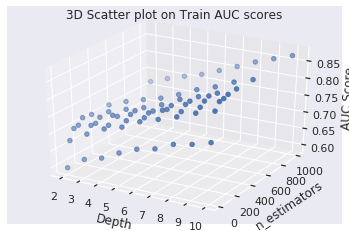

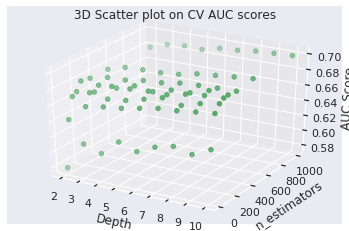

In [0]:
#%%time
#https://stackoverflow.com/questions/53311685/difference-between-ax-set-xlabel-and-ax-xaxis-set-label-in-matplotlib-3-0-1
#-------------------------------------------------------3D-Plot for Train Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.scatter(MD, ES,AUC_TR, c='b', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()
plt.close()

#-------------------------------------------------------3D-Plot for CV Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

ax.scatter(MD, ES, AUC_CV, c='g', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on CV AUC scores')
plt.show()
plt.close()

# HEATMAP

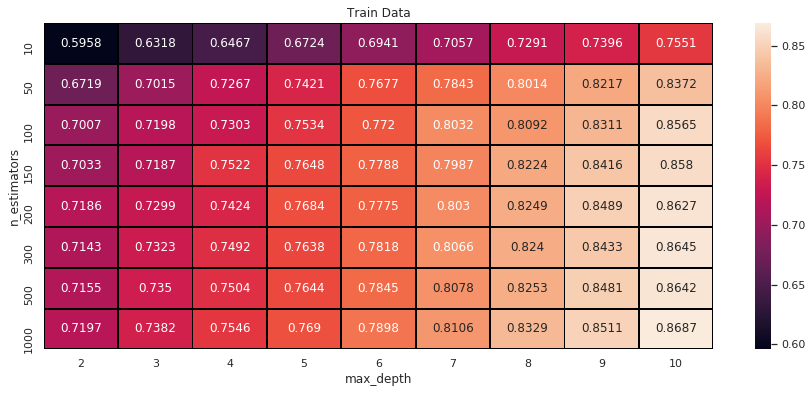

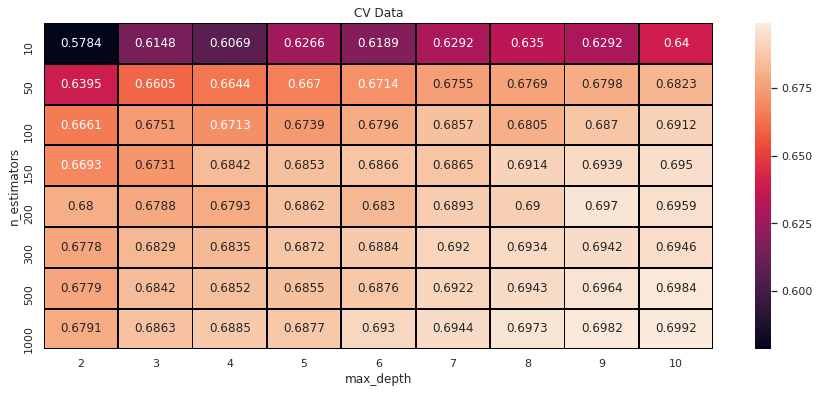

CPU times: user 1.18 s, sys: 437 ms, total: 1.61 s
Wall time: 1.14 s


In [0]:
%%time
#-----------------------------------------------Heat Map for Train data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_TR':AUC_TR}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_TR')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('Train Data')
plt.show()

#-----------------------------------------------Heat Map for CV data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_CV':AUC_CV}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_CV')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('CV Data')
plt.show()

In [0]:
BOW_opt = RandomForestClassifier(n_estimators=BOW_Best_ES,max_depth=BOW_Best_MD,n_jobs=-1,class_weight='balanced')
#pdb.set_trace()
BOW_opt.fit(BOW_Train, Y_Train)
pred = BOW_opt.predict(BOW_Test)

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, BOW_opt.predict_proba(BOW_Train)[:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, BOW_opt.predict_proba(BOW_Test)[:,1])

# BOW ROC PLOT

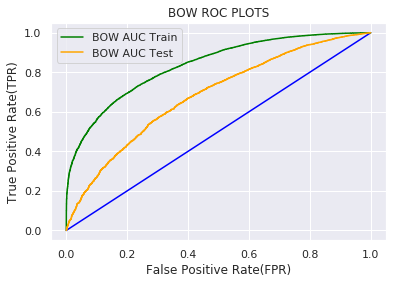

------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.8357237027801431
AUC Test (for best estimator and depth) = 0.6830153857549816
CPU times: user 24.2 s, sys: 605 ms, total: 24.8 s
Wall time: 2.31 s


In [0]:
%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="BOW AUC Train", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="BOW AUC Test", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("BOW ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for best estimator and depth) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for best estimator and depth) =", auc(a_fpr_Test, a_tpr_Test))
BOW_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred1 = BOW_opt.predict(BOW_Train)
pred2 = BOW_opt.predict(BOW_Test)


# BOW CONFUSION MATRIX

CPU times: user 88.2 ms, sys: 44.7 ms, total: 133 ms
Wall time: 82.9 ms


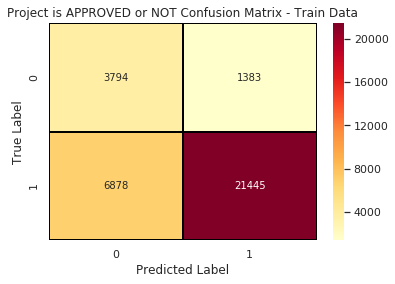

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred1)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 3794; False Negative = 6878; True Positive = 21445; False Positive = 1383<br>
Accuracy (Overall, how often is the classifier correct) = 0.76<br>
Precision(When it predicts yes, how often is it correct) =0.94<br>
Misclassification (Overall, how often is it wrong) =0.25</font>




CPU times: user 74.2 ms, sys: 46.9 ms, total: 121 ms
Wall time: 69.3 ms


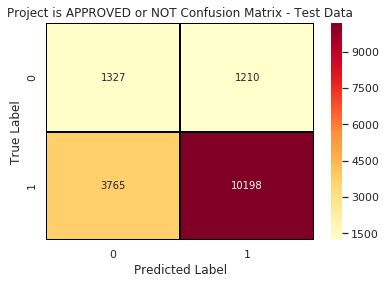

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred2)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 1327; False Negative = 3765; True Positive = 10198; False Positive = 1210<br>
Accuracy (Overall, how often is the classifier correct) = 0.70<br>
Precision(When it predicts yes, how often is it correct) =0.90<br>
Misclassification (Overall, how often is it wrong) =0.31</font>


### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [0]:
%%time

RF_clf = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
RFRan_clf = RandomizedSearchCV(RF_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True,verbose=1,n_iter=100)
RFRan_clf.fit(TFIDF_Train, Y_Train)
print("-"*120)
print(RFRan_clf.best_estimator_)
print("-"*120)
TFIDF_Best_ES=RFRan_clf.best_params_['n_estimators']
TFIDF_Best_MD=RFRan_clf.best_params_['max_depth']
AUC_TR= RFRan_clf.cv_results_['mean_train_score']
AUC_CV = RFRan_clf.cv_results_['mean_test_score']

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.5min finished


------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
------------------------------------------------------------------------------------------------------------------------
CPU times: user 1min 5s, sys: 2.16 s, total: 1min 7s
Wall time: 1min 34s


# 3D PLOT

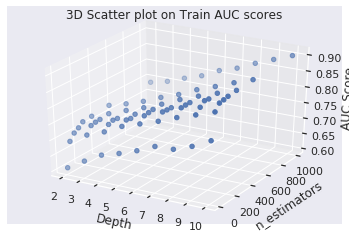

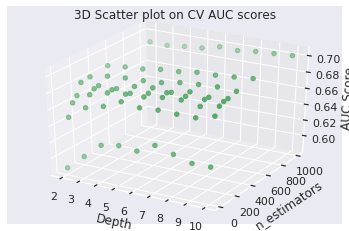

CPU times: user 428 ms, sys: 397 ms, total: 825 ms
Wall time: 348 ms


In [0]:
%%time
#https://stackoverflow.com/questions/53311685/difference-between-ax-set-xlabel-and-ax-xaxis-set-label-in-matplotlib-3-0-1
#-------------------------------------------------------3D-Plot for Train Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.scatter(MD, ES,AUC_TR, c='b', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()
plt.close()

#-------------------------------------------------------3D-Plot for CV Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

ax.scatter(MD, ES, AUC_CV, c='g', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on CV AUC scores')
plt.show()
plt.close()

# HEATMAP

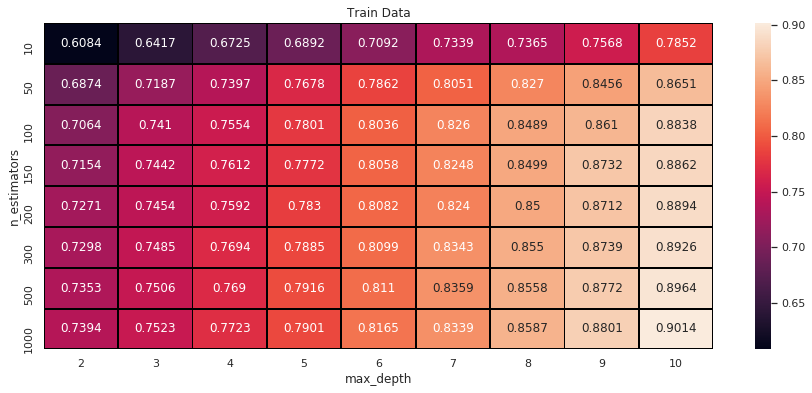

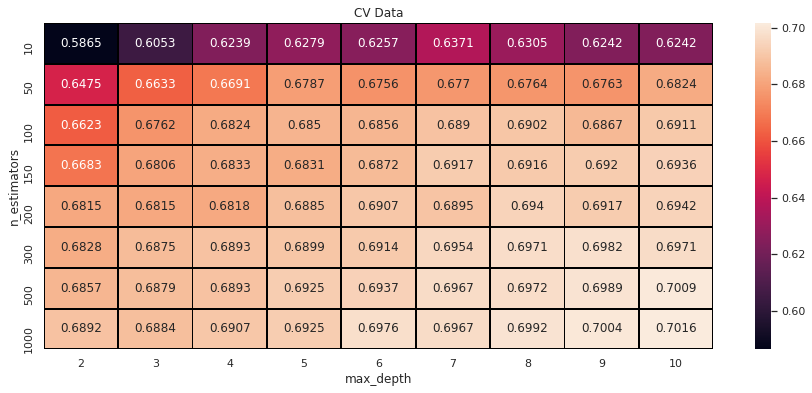

CPU times: user 1.2 s, sys: 448 ms, total: 1.65 s
Wall time: 1.17 s


In [0]:
%%time
#-----------------------------------------------Heat Map for Train data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_TR':AUC_TR}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_TR')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('Train Data')
plt.show()

#-----------------------------------------------Heat Map for CV data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_CV':AUC_CV}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_CV')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('CV Data')
plt.show()

In [0]:
%%time
TFIDF_opt = RandomForestClassifier(n_estimators=TFIDF_Best_ES,max_depth=TFIDF_Best_MD,n_jobs=-1,class_weight='balanced')
#pdb.set_trace()
TFIDF_opt.fit(TFIDF_Train, Y_Train)
pred = TFIDF_opt.predict(TFIDF_Test)

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, TFIDF_opt.predict_proba(TFIDF_Train)[:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, TFIDF_opt.predict_proba(TFIDF_Test)[:,1])

CPU times: user 1min 35s, sys: 2.93 s, total: 1min 38s
Wall time: 7.54 s


# TFIDF ROC PLOT

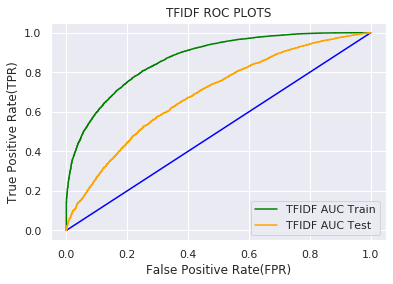

------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.8678407507381374
AUC Test (for best estimator and depth) = 0.6890352370252921
CPU times: user 24.2 s, sys: 582 ms, total: 24.8 s
Wall time: 2.17 s


In [0]:
%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="TFIDF AUC Train", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="TFIDF AUC Test", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("TFIDF ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for best estimator and depth) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for best estimator and depth) =", auc(a_fpr_Test, a_tpr_Test))
TFIDF_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred3 = TFIDF_opt.predict(TFIDF_Train)
pred4 = TFIDF_opt.predict(TFIDF_Test)

# TFIDF CONFUSION MATRIX

CPU times: user 88.5 ms, sys: 45.5 ms, total: 134 ms
Wall time: 83.5 ms


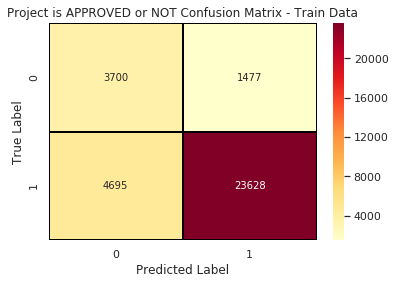

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred3)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 3700; False Negative = 4695; True Positive = 23628; False Positive = 1477<br>
Accuracy (Overall, how often is the classifier correct) = 0.82<br>
Precision(When it predicts yes, how often is it correct) =0.95<br>
Misclassification (Overall, how often is it wrong) =0.19</font>


CPU times: user 75.6 ms, sys: 41.7 ms, total: 117 ms
Wall time: 68.4 ms


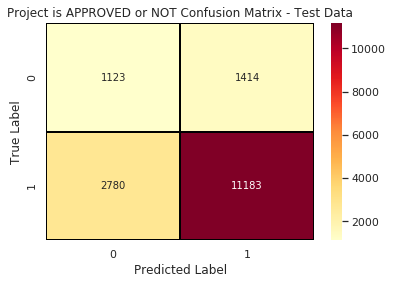

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred4)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 1123; False Negative = 2780; True Positive = 11183; False Positive = 1414<br>
Accuracy (Overall, how often is the classifier correct) = 0.75<br>
Precision(When it predicts yes, how often is it correct) =0.89<br>
Misclassification (Overall, how often is it wrong) =0.26</font>


### 2.4.3 Applying Random Forests on AVG_W2V<font color='red'> SET 3</font>

In [0]:
%%time

RF_clf = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
RFRan_clf = RandomizedSearchCV(RF_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True,verbose=1,n_iter=100)
RFRan_clf.fit(AVG_W2V_Train, Y_Train)
print("-"*120)
print(RFRan_clf.best_estimator_)
print("-"*120)
AVG_W2V_Best_ES=RFRan_clf.best_params_['n_estimators']
AVG_W2V_Best_MD=RFRan_clf.best_params_['max_depth']
AUC_TR= RFRan_clf.cv_results_['mean_train_score']
AUC_CV = RFRan_clf.cv_results_['mean_test_score']

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.8min finished


------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
------------------------------------------------------------------------------------------------------------------------
CPU times: user 4min 12s, sys: 2.49 s, total: 4min 15s
Wall time: 6min 53s


# 3D PLOT

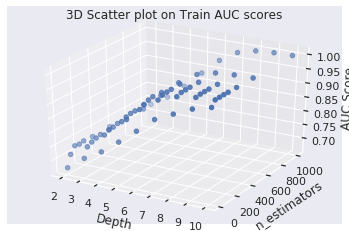

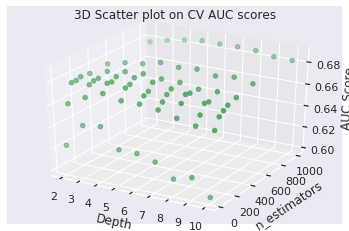

CPU times: user 1.02 s, sys: 4.06 s, total: 5.08 s
Wall time: 369 ms


In [0]:
%%time
#https://stackoverflow.com/questions/53311685/difference-between-ax-set-xlabel-and-ax-xaxis-set-label-in-matplotlib-3-0-1
#-------------------------------------------------------3D-Plot for Train Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.scatter(MD, ES,AUC_TR, c='b', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()
plt.close()

#-------------------------------------------------------3D-Plot for CV Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

ax.scatter(MD, ES, AUC_CV, c='g', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on CV AUC scores')
plt.show()
plt.close()

# HEATMAP

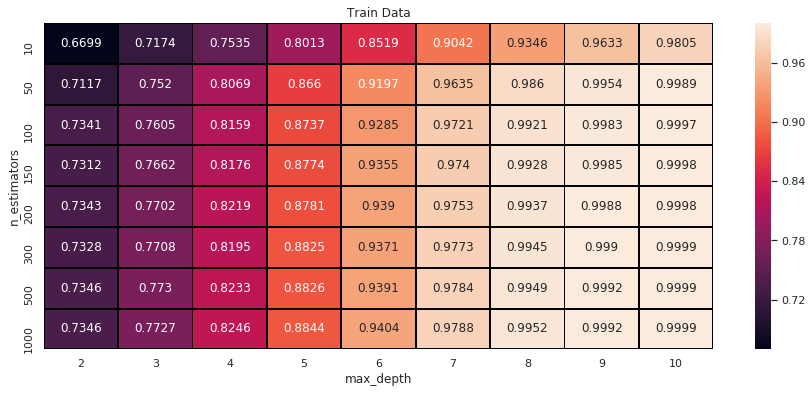

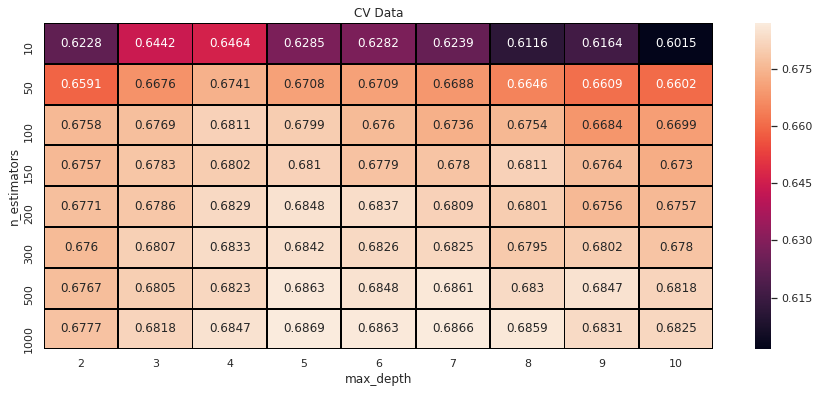

CPU times: user 1.17 s, sys: 447 ms, total: 1.62 s
Wall time: 1.14 s


In [0]:
%%time
#-----------------------------------------------Heat Map for Train data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_TR':AUC_TR}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_TR')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('Train Data')
plt.show()

#-----------------------------------------------Heat Map for CV data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_CV':AUC_CV}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_CV')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('CV Data')
plt.show()

In [0]:
%%time
AVG_W2V_opt = RandomForestClassifier(n_estimators=AVG_W2V_Best_ES,max_depth=AVG_W2V_Best_MD,n_jobs=-1,class_weight='balanced')
#pdb.set_trace()
AVG_W2V_opt.fit(AVG_W2V_Train, Y_Train)
pred = AVG_W2V_opt.predict(AVG_W2V_Test)

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, AVG_W2V_opt.predict_proba(AVG_W2V_Train)[:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, AVG_W2V_opt.predict_proba(AVG_W2V_Test)[:,1])

CPU times: user 4min 36s, sys: 1.85 s, total: 4min 38s
Wall time: 9.63 s


# AVG_W2V ROC PLOT

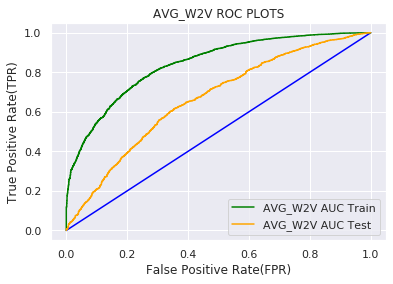

------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.8408032063349351
AUC Test (for best estimator and depth) = 0.6638840874428062
CPU times: user 19.4 s, sys: 390 ms, total: 19.8 s
Wall time: 1.76 s


In [0]:
%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="AVG_W2V AUC Train", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="AVG_W2V AUC Test", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AVG_W2V ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for best estimator and depth) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for best estimator and depth) =", auc(a_fpr_Test, a_tpr_Test))
AVG_W2V_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred5 = AVG_W2V_opt.predict(AVG_W2V_Train)
pred6 = AVG_W2V_opt.predict(AVG_W2V_Test)


# AVG_W2V CONFUSION MATRIX

CPU times: user 71.9 ms, sys: 49.2 ms, total: 121 ms
Wall time: 68.4 ms


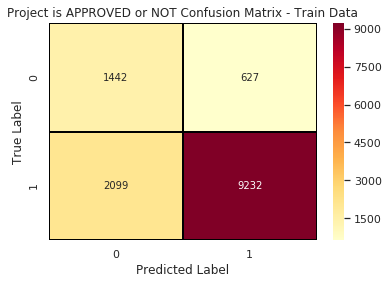

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred5)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 1442; False Negative = 2099; True Positive = 9232; False Positive = 627<br>
Accuracy (Overall, how often is the classifier correct) = 0.80<br>
Precision(When it predicts yes, how often is it correct) =0.94<br>
Misclassification (Overall, how often is it wrong) =0.21</font>


CPU times: user 71.4 ms, sys: 42.3 ms, total: 114 ms
Wall time: 62.1 ms


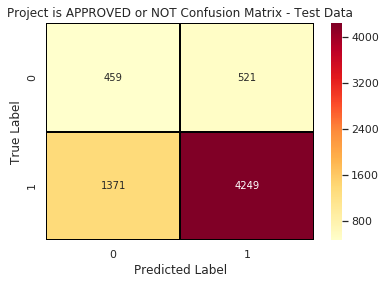

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred6)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 459; False Negative = 1371; True Positive = 4249; False Positive = 521<br>
Accuracy (Overall, how often is the classifier correct) = 0.72<br>
Precision(When it predicts yes, how often is it correct) =0.90<br>
Misclassification (Overall, how often is it wrong) =0.29</font>


### 2.4.4 Applying Random Forests on TFIDF_W2V<font color='red'> SET 4</font>

In [0]:
%%time

RF_clf = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
RFRan_clf = RandomizedSearchCV(RF_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True,verbose=1,n_iter=100)
RFRan_clf.fit(TFIDF_W2V_Train, Y_Train)
print("-"*120)
print(RFRan_clf.best_estimator_)
print("-"*120)
TFIDF_W2V_Best_ES=RFRan_clf.best_params_['n_estimators']
TFIDF_W2V_Best_MD=RFRan_clf.best_params_['max_depth']
AUC_TR= RFRan_clf.cv_results_['mean_train_score']
AUC_CV = RFRan_clf.cv_results_['mean_test_score']

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.5min finished


------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
------------------------------------------------------------------------------------------------------------------------
CPU times: user 40.6 s, sys: 506 ms, total: 41.1 s
Wall time: 3min 29s


# 3D PLOT

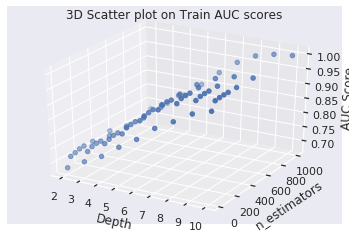

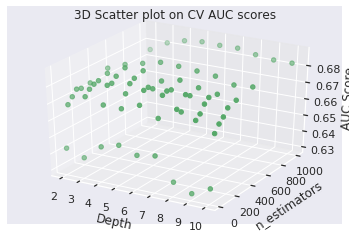

CPU times: user 407 ms, sys: 403 ms, total: 810 ms
Wall time: 332 ms


In [0]:
%%time
#https://stackoverflow.com/questions/53311685/difference-between-ax-set-xlabel-and-ax-xaxis-set-label-in-matplotlib-3-0-1
#-------------------------------------------------------3D-Plot for Train Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.scatter(MD, ES,AUC_TR, c='b', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()
plt.close()

#-------------------------------------------------------3D-Plot for CV Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

ax.scatter(MD, ES, AUC_CV, c='g', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on CV AUC scores')
plt.show()
plt.close()

# HEATMAP

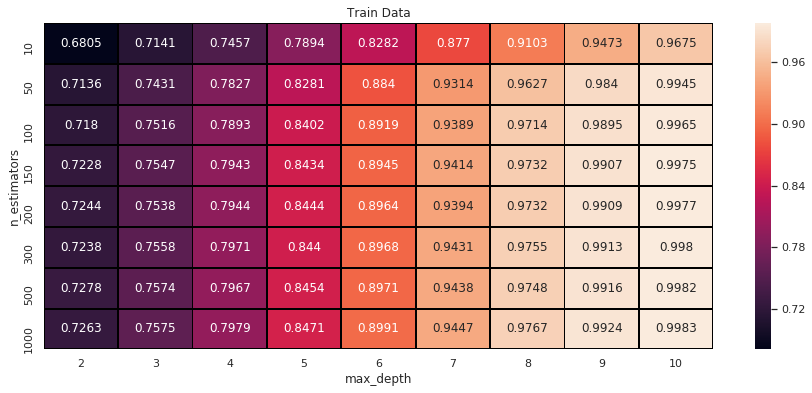

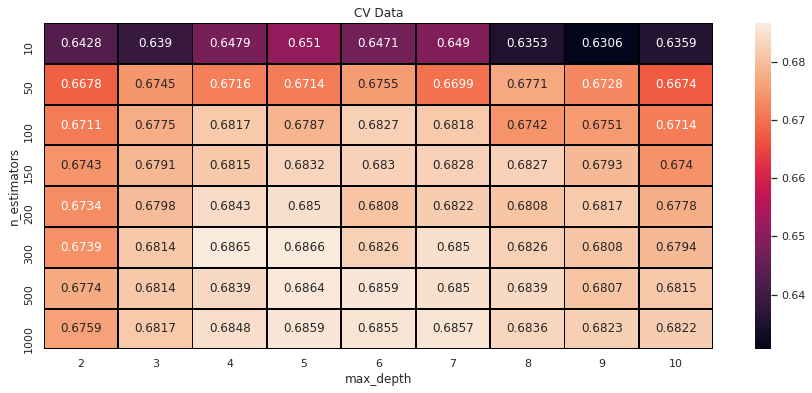

CPU times: user 1.32 s, sys: 446 ms, total: 1.77 s
Wall time: 1.29 s


In [0]:
%%time
#-----------------------------------------------Heat Map for Train data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_TR':AUC_TR}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_TR')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('Train Data')
plt.show()

#-----------------------------------------------Heat Map for CV data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_CV':AUC_CV}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_CV')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('CV Data')
plt.show()

In [0]:
%%time
TFIDF_W2V_opt = RandomForestClassifier(n_estimators=TFIDF_W2V_Best_ES,max_depth=TFIDF_W2V_Best_MD,n_jobs=-1,class_weight='balanced')
#pdb.set_trace()
TFIDF_W2V_opt.fit(TFIDF_W2V_Train, Y_Train)
pred = TFIDF_W2V_opt.predict(TFIDF_W2V_Test)

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, TFIDF_W2V_opt.predict_proba(TFIDF_W2V_Train)[:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, TFIDF_W2V_opt.predict_proba(TFIDF_W2V_Test)[:,1])

CPU times: user 43.6 s, sys: 640 ms, total: 44.3 s
Wall time: 2.57 s


# TFIDF_W2V ROC PLOT

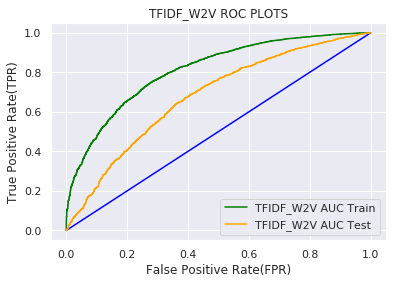

------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.8106247445224307
AUC Test (for best estimator and depth) = 0.6773669111772823
CPU times: user 3.27 s, sys: 164 ms, total: 3.43 s
Wall time: 781 ms


In [0]:

%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="TFIDF_W2V AUC Train", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="TFIDF_W2V AUC Test", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("TFIDF_W2V ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for best estimator and depth) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for best estimator and depth) =", auc(a_fpr_Test, a_tpr_Test))
TFIDF_W2V_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred7 = TFIDF_W2V_opt.predict(TFIDF_W2V_Train)
pred8 = TFIDF_W2V_opt.predict(TFIDF_W2V_Test)

# TFIDF_W2V CONFUSION MATRIX

CPU times: user 86.1 ms, sys: 61.3 ms, total: 147 ms
Wall time: 76.2 ms


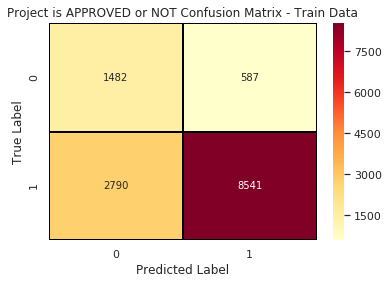

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred7)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 1482; False Negative = 2790; True Positive = 8541; False Positive = 587<br>
Accuracy (Overall, how often is the classifier correct) = 0.75<br>
Precision(When it predicts yes, how often is it correct) =0.94<br>
Misclassification (Overall, how often is it wrong) =0.26</font>


CPU times: user 65.3 ms, sys: 51.2 ms, total: 117 ms
Wall time: 62 ms


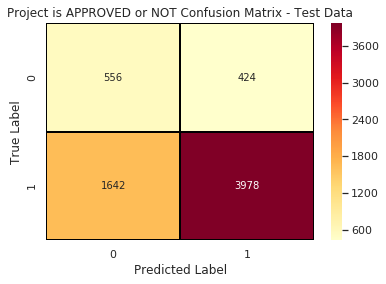

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred8)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 556; False Negative = 1642; True Positive = 3978; False Positive = 424<br>
Accuracy (Overall, how often is the classifier correct) = 0.69<br>
Precision(When it predicts yes, how often is it correct) =0.91<br>
Misclassification (Overall, how often is it wrong) =0.32</font>


### Gradient Boosting

### 2.4.5 Applying Gradient Boosting on BOW<font color='red'> SET 1</font>

In [0]:
%%time
GBDT_clf = GradientBoostingClassifier()
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
GBDTRan_clf = RandomizedSearchCV(GBDT_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True,verbose=1,n_iter=100)
GBDTRan_clf.fit(BOW_Train, Y_Train)
print("-"*120)
print(GBDTRan_clf.best_estimator_)
print("-"*120)
BOWG_Best_ES=GBDTRan_clf.best_params_['n_estimators']
BOWG_Best_MD=GBDTRan_clf.best_params_['max_depth']
AUC_TR= GBDTRan_clf.cv_results_['mean_train_score']
AUC_CV = GBDTRan_clf.cv_results_['mean_test_score']

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 33.6min finished


------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
------------------------------------------------------------------------------------------------------------------------
CPU times: user 4min 42s, sys: 1.4 s, total: 4min 44s
Wall t

# 3D PLOT

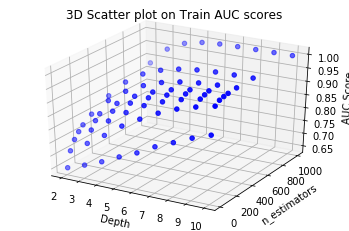

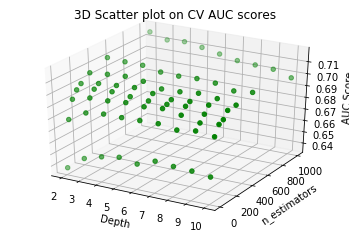

CPU times: user 1.34 s, sys: 3.56 s, total: 4.9 s
Wall time: 800 ms


In [0]:
%%time
#https://stackoverflow.com/questions/53311685/difference-between-ax-set-xlabel-and-ax-xaxis-set-label-in-matplotlib-3-0-1
#-------------------------------------------------------3D-Plot for Train Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.scatter(MD, ES,AUC_TR, c='b', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()
plt.close()

#-------------------------------------------------------3D-Plot for CV Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

ax.scatter(MD, ES, AUC_CV, c='g', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on CV AUC scores')
plt.show()
plt.close()

# HEATMAP

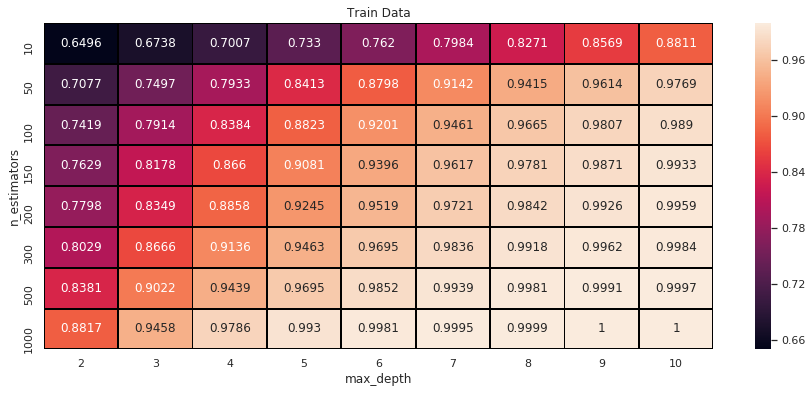

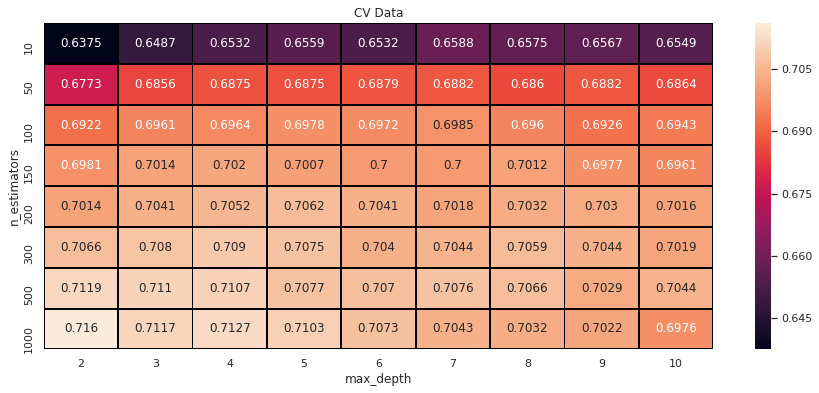

CPU times: user 1.2 s, sys: 446 ms, total: 1.65 s
Wall time: 1.18 s


In [0]:
%%time
#-----------------------------------------------Heat Map for Train data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_TR':AUC_TR}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_TR')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('Train Data')
plt.show()

#-----------------------------------------------Heat Map for CV data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_CV':AUC_CV}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_CV')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('CV Data')
plt.show()

In [0]:
%%time
BOW_opt = GradientBoostingClassifier(n_estimators=BOWG_Best_ES,max_depth=BOWG_Best_MD)
BOW_opt.fit(BOW_Train, Y_Train)
pred = BOW_opt.predict(BOW_Test)

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, BOW_opt.predict_proba(BOW_Train)[:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, BOW_opt.predict_proba(BOW_Test)[:,1])

CPU times: user 4min 40s, sys: 376 ms, total: 4min 40s
Wall time: 4min 40s


# BOW ROC PLOT

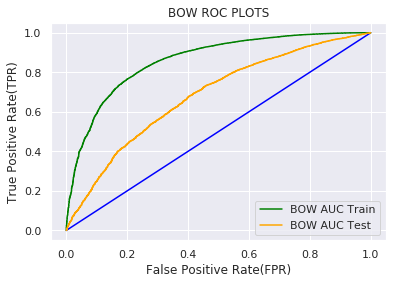

------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.8600601960724177
AUC Test (for best estimator and depth) = 0.6817789969216181
CPU times: user 1.14 s, sys: 7.04 ms, total: 1.15 s
Wall time: 1.14 s


In [0]:
%%time
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci   
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="BOW AUC Train", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="BOW AUC Test", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("BOW ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for best estimator and depth) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for best estimator and depth) =", auc(a_fpr_Test, a_tpr_Test))
G_BOW_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred9 = BOW_opt.predict(BOW_Train)
pred10 = BOW_opt.predict(BOW_Test)


# BOW CONFUSION MATRIX

CPU times: user 90.4 ms, sys: 55.1 ms, total: 145 ms
Wall time: 88.4 ms


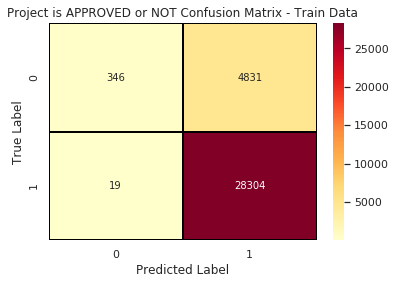

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred9)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 346; False Negative = 19; True Positive = 28304; False Positive = 4831<br>
Accuracy (Overall, how often is the classifier correct) = 0.86<br>
Precision(When it predicts yes, how often is it correct) =0.856<br>
Misclassification (Overall, how often is it wrong) =0.15</font>


CPU times: user 76.7 ms, sys: 44.1 ms, total: 121 ms
Wall time: 70.4 ms


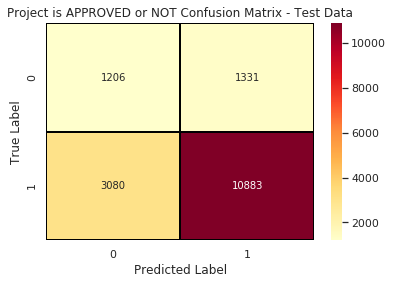

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred10)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 1206; False Negative = 3080; True Positive = 10883; False Positive = 1331<br>
Accuracy (Overall, how often is the classifier correct) = 0.74<br>
Precision(When it predicts yes, how often is it correct) =0.90<br>
Misclassification (Overall, how often is it wrong) =0.27</font>


### 2.4.6 Applying Gradient Boosting on TFIDF<font color='red'> SET 2</font>

In [0]:
%%time
GBDT_clf = GradientBoostingClassifier()
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
GBDTRan_clf = RandomizedSearchCV(GBDT_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True,verbose=1,n_iter=100)
GBDTRan_clf.fit(TFIDF_Train, Y_Train)
print("-"*120)
print(GBDTRan_clf.best_estimator_)
print("-"*120)
TFIDFG_Best_ES=GBDTRan_clf.best_params_['n_estimators']
TFIDFG_Best_MD=GBDTRan_clf.best_params_['max_depth']
AUC_TR= GBDTRan_clf.cv_results_['mean_train_score']
AUC_CV = GBDTRan_clf.cv_results_['mean_test_score']

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 104.3min finished


------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
------------------------------------------------------------------------------------------------------------------------
CPU times: user 8min 12s, sys: 1.14 s, total: 8min 13s
Wall t

# 3D PLOT

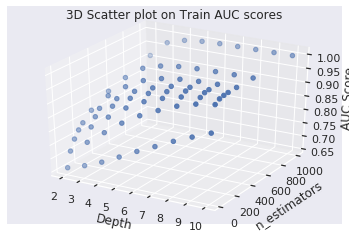

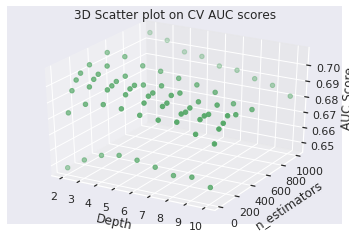

CPU times: user 1.07 s, sys: 4.05 s, total: 5.12 s
Wall time: 389 ms


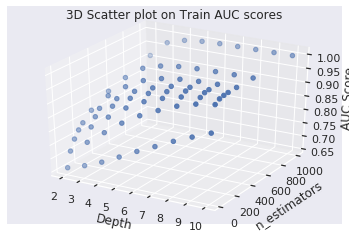

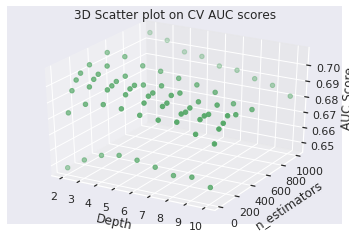

CPU times: user 1.07 s, sys: 4.05 s, total: 5.12 s
Wall time: 389 ms


In [0]:
%%time
#https://stackoverflow.com/questions/53311685/difference-between-ax-set-xlabel-and-ax-xaxis-set-label-in-matplotlib-3-0-1
#-------------------------------------------------------3D-Plot for Train Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.scatter(MD, ES,AUC_TR, c='b', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()
plt.close()

#-------------------------------------------------------3D-Plot for CV Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

ax.scatter(MD, ES, AUC_CV, c='g', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on CV AUC scores')
plt.show()
plt.close()

# HEATMAP

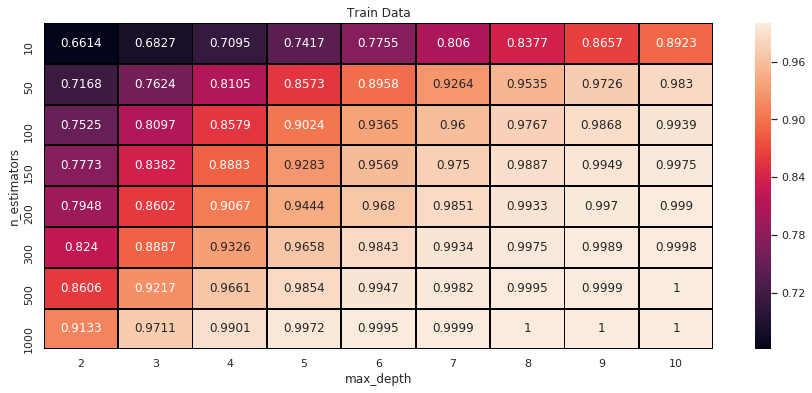

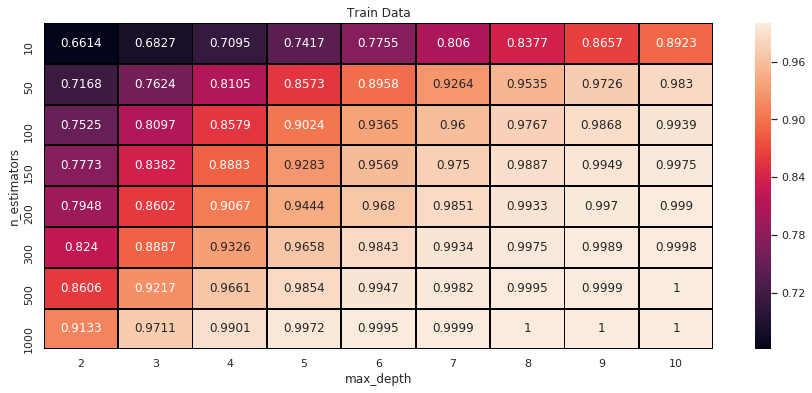

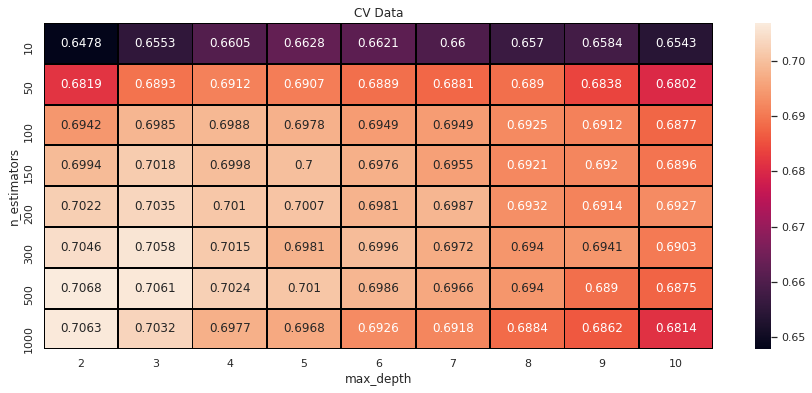

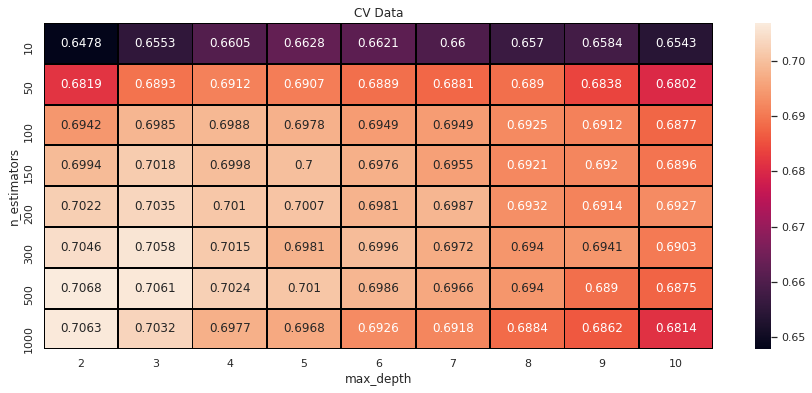

CPU times: user 1.21 s, sys: 425 ms, total: 1.64 s
Wall time: 1.17 s
CPU times: user 1.21 s, sys: 425 ms, total: 1.64 s
Wall time: 1.17 s


In [0]:
%%time
#-----------------------------------------------Heat Map for Train data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_TR':AUC_TR}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_TR')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('Train Data')
plt.show()

#-----------------------------------------------Heat Map for CV data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_CV':AUC_CV}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_CV')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('CV Data')
plt.show()

In [0]:
%%time
TFIDF_opt = GradientBoostingClassifier(n_estimators=TFIDFG_Best_ES,max_depth=TFIDFG_Best_MD)
TFIDF_opt.fit(TFIDF_Train, Y_Train)
pred = TFIDF_opt.predict(TFIDF_Test)

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, TFIDF_opt.predict_proba(TFIDF_Train)[:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, TFIDF_opt.predict_proba(TFIDF_Test)[:,1])

CPU times: user 8min 13s, sys: 146 ms, total: 8min 13s
Wall time: 8min 13s
CPU times: user 8min 13s, sys: 146 ms, total: 8min 13s
Wall time: 8min 13s


# TFIDF ROC PLOT

In [0]:
%%time
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci   
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="TFIDF AUC Train", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="TFIDF AUC Test", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("TFIDF ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for best estimator and depth) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for best estimator and depth) =", auc(a_fpr_Test, a_tpr_Test))
G_TFIDF_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred11 = TFIDF_opt.predict(TFIDF_Train)
pred12 = TFIDF_opt.predict(TFIDF_Test)

------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.83113411064781
AUC Test (for best estimator and depth) = 0.6740369297979392
------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.83113411064781
AUC Test (for best estimator and depth) = 0.6740369297979392
CPU times: user 881 ms, sys: 12 ms, total: 893 ms
Wall time: 888 ms
CPU times: user 881 ms, sys: 12 ms, total: 893 ms
Wall time: 888 ms


# TFIDF CONFUSION MATRIX

CPU times: user 334 ms, sys: 55 ms, total: 389 ms
Wall time: 335 ms
CPU times: user 334 ms, sys: 55 ms, total: 389 ms
Wall time: 335 ms


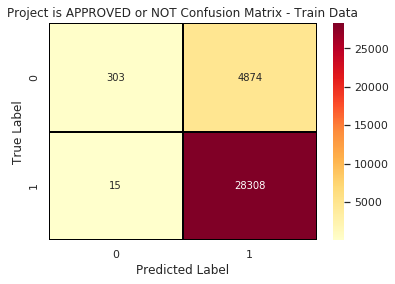

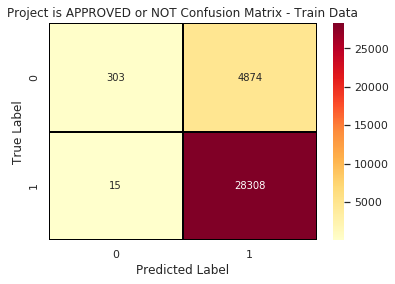

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred11)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 303; False Negative = 15; True Positive = 28308; False Positive = 4874<br>
Accuracy (Overall, how often is the classifier correct) = 0.86<br>
Precision(When it predicts yes, how often is it correct) =0.86<br>
Misclassification (Overall, how often is it wrong) =0.15</font>


CPU times: user 76 ms, sys: 45 ms, total: 121 ms
Wall time: 69.5 ms


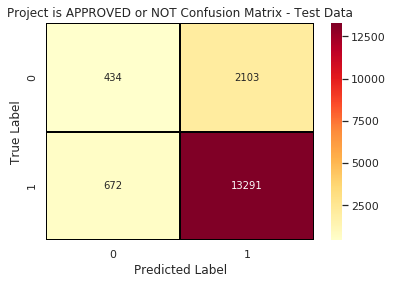

CPU times: user 76 ms, sys: 45 ms, total: 121 ms
Wall time: 69.5 ms


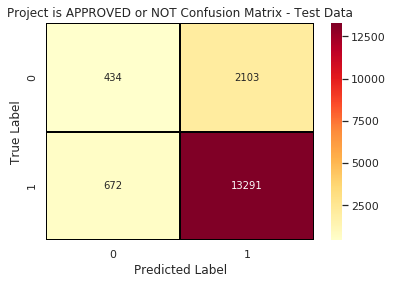

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred12)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 434; False Negative = 672; True Positive = 13291; False Positive = 2103<br>
Accuracy (Overall, how often is the classifier correct) = 0.84<br>
Precision(When it predicts yes, how often is it correct) =0.87<br>
Misclassification (Overall, how often is it wrong) =0.17</font>


### 2.4.7 Applying Gradient Boosting on AVG_W2V<font color='red'> SET 3</font>

In [0]:
%%time
GBDT_clf = GradientBoostingClassifier()
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
GBDTRan_clf = RandomizedSearchCV(GBDT_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True,verbose=1,n_iter=100)
GBDTRan_clf.fit(AVG_W2V_Train, Y_Train)
print("-"*120)
print(GBDTRan_clf.best_estimator_)
print("-"*120)
AVG_W2VG_Best_ES=GBDTRan_clf.best_params_['n_estimators']
AVG_W2VG_Best_MD=GBDTRan_clf.best_params_['max_depth']
AUC_TR= GBDTRan_clf.cv_results_['mean_train_score']
AUC_CV = GBDTRan_clf.cv_results_['mean_test_score']


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 58.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 200.1min finished


------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
------------------------------------------------------------------------------------------------------------------------
CPU times: user 5min 44s, sys: 1.35 s, total: 5min 45s
Wall t

# 3D PLOT

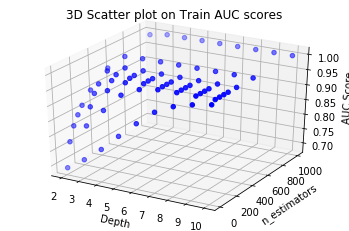

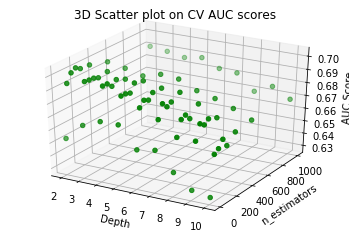

CPU times: user 1.15 s, sys: 4 s, total: 5.15 s
Wall time: 469 ms


In [0]:
%%time
#https://stackoverflow.com/questions/53311685/difference-between-ax-set-xlabel-and-ax-xaxis-set-label-in-matplotlib-3-0-1
#-------------------------------------------------------3D-Plot for Train Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.scatter(MD, ES,AUC_TR, c='b', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()
plt.close()

#-------------------------------------------------------3D-Plot for CV Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

ax.scatter(MD, ES, AUC_CV, c='g', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on CV AUC scores')
plt.show()
plt.close()

# HEATMAP

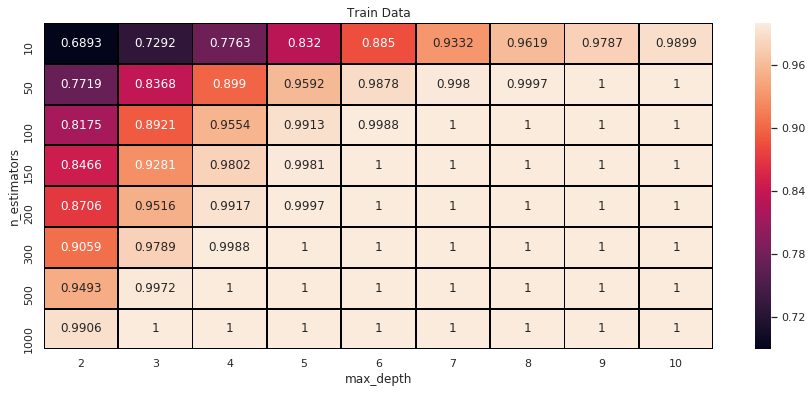

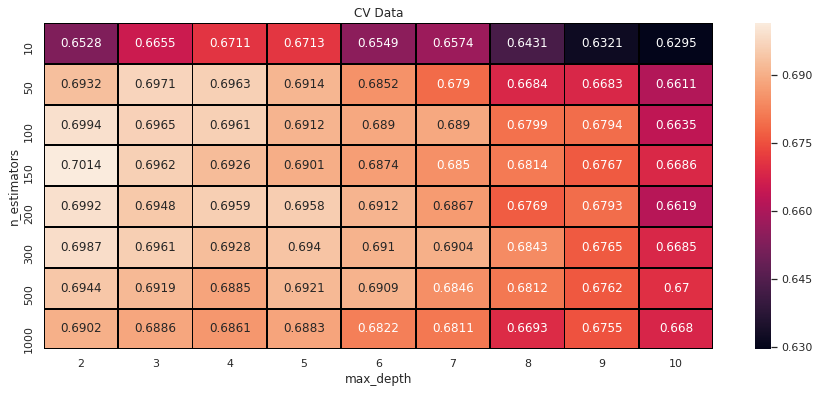

CPU times: user 1.3 s, sys: 428 ms, total: 1.73 s
Wall time: 1.25 s


In [0]:
%%time
#-----------------------------------------------Heat Map for Train data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_TR':AUC_TR}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_TR')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('Train Data')
plt.show()

#-----------------------------------------------Heat Map for CV data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_CV':AUC_CV}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_CV')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('CV Data')
plt.show()

In [0]:
%%time
AVG_W2V_opt = GradientBoostingClassifier(n_estimators=AVG_W2VG_Best_ES,max_depth=AVG_W2VG_Best_MD)
AVG_W2V_opt.fit(AVG_W2V_Train, Y_Train)
pred = AVG_W2V_opt.predict(AVG_W2V_Test)

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, AVG_W2V_opt.predict_proba(AVG_W2V_Train)[:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, AVG_W2V_opt.predict_proba(AVG_W2V_Test)[:,1])

CPU times: user 5min 44s, sys: 132 ms, total: 5min 44s
Wall time: 5min 44s


# AVG_W2V ROC PLOT

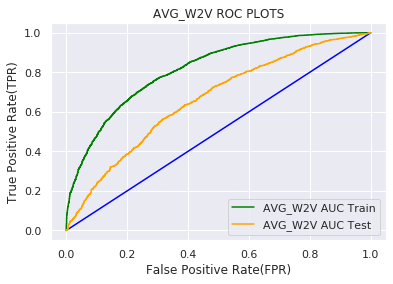

------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.8160369127257701
AUC Test (for best estimator and depth) = 0.6618643329217808
CPU times: user 724 ms, sys: 4.03 ms, total: 728 ms
Wall time: 723 ms


In [0]:
%%time
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="AVG_W2V AUC Train", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="AVG_W2V AUC Test", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AVG_W2V ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for best estimator and depth) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for best estimator and depth) =", auc(a_fpr_Test, a_tpr_Test))
G_AVG_W2V_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred13 = AVG_W2V_opt.predict(AVG_W2V_Train)
pred14 = AVG_W2V_opt.predict(AVG_W2V_Test)


# AVG_W2V CONFUSION MATRIX

CPU times: user 91.7 ms, sys: 69 ms, total: 161 ms
Wall time: 84.8 ms


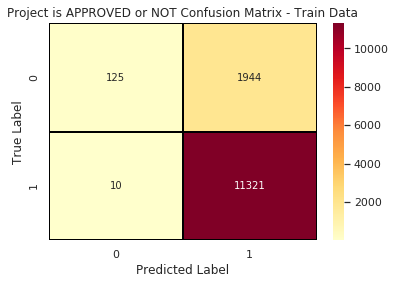

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred13)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 125; False Negative = 10; True Positive = 11321; False Positive = 1944<br>
Accuracy (Overall, how often is the classifier correct) = 0.86<br>
Precision(When it predicts yes, how often is it correct) =0.86<br>
Misclassification (Overall, how often is it wrong) =0.15</font>


CPU times: user 85.8 ms, sys: 64.1 ms, total: 150 ms
Wall time: 75.3 ms


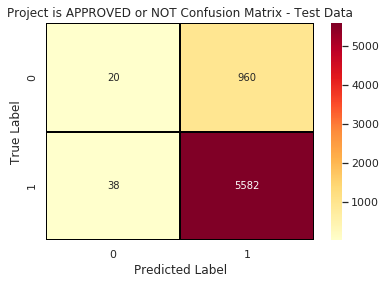

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred14)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 20; False Negative = 38; True Positive = 5582; False Positive = 960<br>
Accuracy (Overall, how often is the classifier correct) = 0.85<br>
Precision(When it predicts yes, how often is it correct) =0.86<br>
Misclassification (Overall, how often is it wrong) =0.16</font>


### 2.4.8 Applying Gradient Boosting on TFIDF_W2V<font color='red'> SET 4</font>

In [0]:
%%time
GBDT_clf = GradientBoostingClassifier()
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
GBDTRan_clf = RandomizedSearchCV(GBDT_clf, parameters, cv=3, scoring='roc_auc',n_jobs=-1,return_train_score=True,verbose=1,n_iter=100)
GBDTRan_clf.fit(TFIDF_W2V_Train, Y_Train)
print("-"*120)
print(GBDTRan_clf.best_estimator_)
print("-"*120)
TFIDF_W2VG_Best_ES=GBDTRan_clf.best_params_['n_estimators']
TFIDF_W2VG_Best_MD=GBDTRan_clf.best_params_['max_depth']
AUC_TR= GBDTRan_clf.cv_results_['mean_train_score']
AUC_CV = GBDTRan_clf.cv_results_['mean_test_score']

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 82.8min finished


------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
------------------------------------------------------------------------------------------------------------------------
CPU times: user 5min 46s, sys: 1.29 s, total: 5min 47s
Wall t

# 3D PLOT

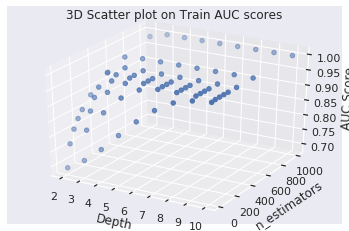

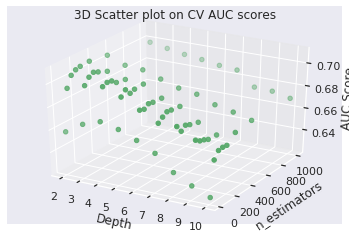

CPU times: user 1.08 s, sys: 4.03 s, total: 5.12 s
Wall time: 381 ms


In [0]:
%%time
#https://stackoverflow.com/questions/53311685/difference-between-ax-set-xlabel-and-ax-xaxis-set-label-in-matplotlib-3-0-1
#-------------------------------------------------------3D-Plot for Train Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.scatter(MD, ES,AUC_TR, c='b', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on Train AUC scores')
plt.show()
plt.close()

#-------------------------------------------------------3D-Plot for CV Dataset---------------------------------------------------------------------------
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

ax.scatter(MD, ES, AUC_CV, c='g', marker='o')
ax.set_xlabel('Depth')
ax.yaxis.set_label_text('n_estimators')
ax.zaxis.set_label_text('AUC Score')
plt.title('3D Scatter plot on CV AUC scores')
plt.show()
plt.close()

# HEATMAP

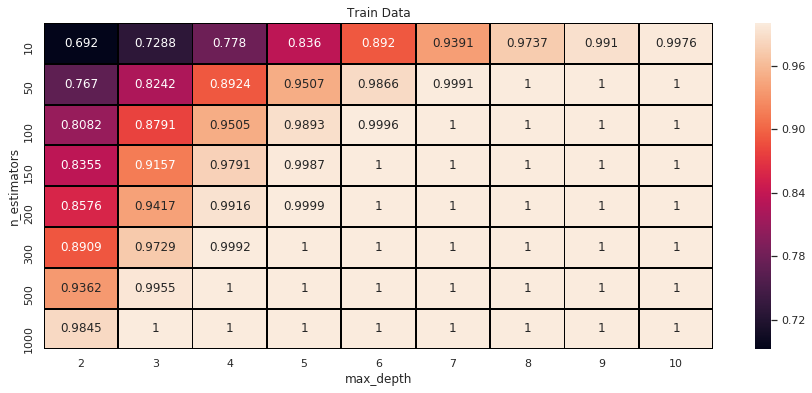

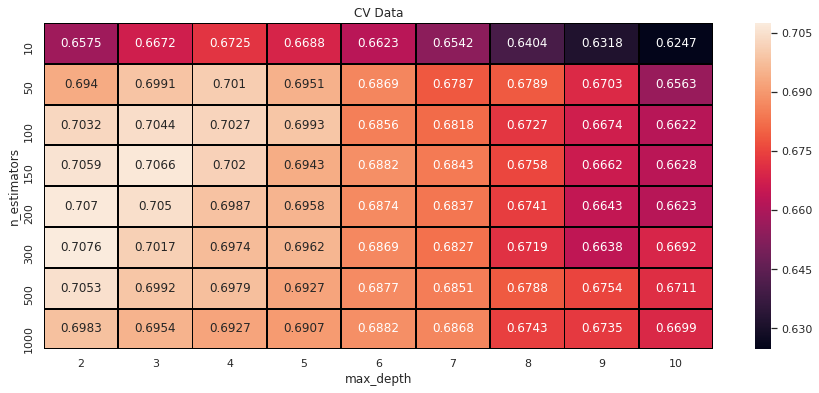

CPU times: user 1.18 s, sys: 417 ms, total: 1.6 s
Wall time: 1.13 s


In [0]:
%%time
#-----------------------------------------------Heat Map for Train data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_TR':AUC_TR}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_TR')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('Train Data')
plt.show()

#-----------------------------------------------Heat Map for CV data--------------------------------------------------------------------------------------
plt.close()
d={'n_estimators':ES,'max_depth':MD,'AUC_CV':AUC_CV}
df=pd.DataFrame(d)
result = df.pivot(index='n_estimators',columns='max_depth',values='AUC_CV')
sns.set()
plt.figure(figsize=(15,6))
sns.heatmap(result,annot = True, fmt='.4g',linewidths=1,linecolor='black')
plt.title('CV Data')
plt.show()

In [0]:
%%time
TFIDF_W2V_opt = GradientBoostingClassifier(n_estimators=TFIDF_W2VG_Best_ES,max_depth=TFIDF_W2VG_Best_MD)
TFIDF_W2V_opt.fit(TFIDF_W2V_Train, Y_Train)
pred = TFIDF_W2V_opt.predict(TFIDF_W2V_Test)

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, TFIDF_W2V_opt.predict_proba(TFIDF_W2V_Train)[:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, TFIDF_W2V_opt.predict_proba(TFIDF_W2V_Test)[:,1])

CPU times: user 5min 46s, sys: 198 ms, total: 5min 46s
Wall time: 5min 46s


# TFIDF_W2V ROC PLOT

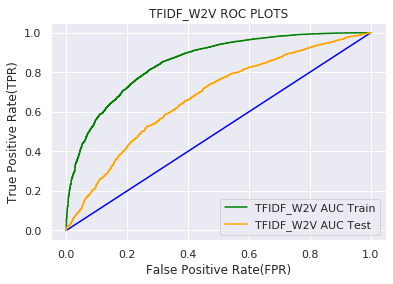

------------------------------------------------------------------------------------------------------------------------
AUC Train (for best estimator and depth) = 0.8523021762775286
AUC Test (for best estimator and depth) = 0.6735076984530467
CPU times: user 629 ms, sys: 7.03 ms, total: 636 ms
Wall time: 631 ms


In [0]:
%%time
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="TFIDF_W2V AUC Train", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="TFIDF_W2V AUC Test", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("TFIDF_W2V ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for best estimator and depth) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for best estimator and depth) =", auc(a_fpr_Test, a_tpr_Test))
G_TFIDF_W2V_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred15 = TFIDF_W2V_opt.predict(TFIDF_W2V_Train)
pred16 = TFIDF_W2V_opt.predict(TFIDF_W2V_Test)

# TFIDF_W2V CONFUSION MATRIX

CPU times: user 77.5 ms, sys: 45.1 ms, total: 123 ms
Wall time: 69.7 ms


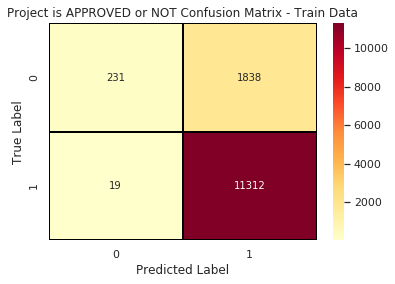

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred15)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 231; False Negative = 19; True Positive = 11312; False Positive = 1838<br>
Accuracy (Overall, how often is the classifier correct) = 0.87<br>
Precision(When it predicts yes, how often is it correct) =0.87<br>
Misclassification (Overall, how often is it wrong) =0.14</font>


CPU times: user 75.3 ms, sys: 46 ms, total: 121 ms
Wall time: 65.5 ms


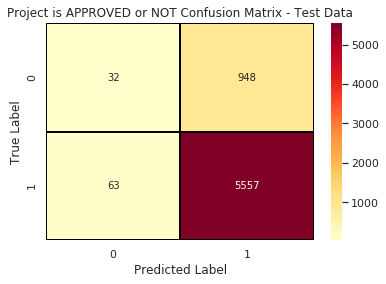

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred16)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 32; False Negative = 63; True Positive = 5557; False Positive = 948<br>
Accuracy (Overall, how often is the classifier correct) = 0.85<br>
Precision(When it predicts yes, how often is it correct) =0.86<br>
Misclassification (Overall, how often is it wrong) =0.16</font>


# Conclusion

In [0]:
%%time
# Please compare all your models using Prettytable library

pt = PrettyTable()
pt.field_names= ("S.No","Vectorizer", "Model", "n_estimators","max_depth", "AUC")
pt.add_row(["1","BOW", "RandomForest",BOW_Best_ES, BOW_Best_MD, BOW_AUC])
pt.add_row(["2","TFIDF", "RandomForest", TFIDF_Best_ES, TFIDF_Best_MD, TFIDF_AUC])
pt.add_row(["3","AVG_W2V", "RandomForest",AVG_W2V_Best_ES, AVG_W2V_Best_MD, AVG_W2V_AUC])
pt.add_row(["4","TFIDF_W2V", "RandomForest", TFIDF_W2V_Best_ES, TFIDF_W2V_Best_MD, TFIDF_W2V_AUC])
pt.add_row(["5","BOW", "GradientBoosting",BOWG_Best_ES, BOWG_Best_MD, G_BOW_AUC])
pt.add_row(["6","TFIDF", "GradientBoosting", TFIDFG_Best_ES, TFIDFG_Best_MD, G_TFIDF_AUC])
pt.add_row(["7","AVG_W2V", "GradientBoosting", AVG_W2VG_Best_ES, AVG_W2VG_Best_MD, G_AVG_W2V_AUC])
pt.add_row(["8","TFIDF_W2V", "GradientBoosting", TFIDF_W2VG_Best_ES, TFIDF_W2VG_Best_MD, G_TFIDF_W2V_AUC])
print(pt)

+------+------------+------------------+--------------+-----------+------+
| S.No | Vectorizer |      Model       | n_estimators | max_depth | AUC  |
+------+------------+------------------+--------------+-----------+------+
|  1   |    BOW     |   RandomForest   |     1000     |     10    | 0.68 |
|  2   |   TFIDF    |   RandomForest   |     1000     |     10    | 0.69 |
|  3   |  AVG_W2V   |   RandomForest   |     1000     |     5     | 0.66 |
|  4   | TFIDF_W2V  |   RandomForest   |     300      |     5     | 0.68 |
|  5   |    BOW     | GradientBoosting |     1000     |     2     | 0.68 |
|  6   |   TFIDF    | GradientBoosting |     500      |     2     | 0.67 |
|  7   |  AVG_W2V   | GradientBoosting |     150      |     2     | 0.66 |
|  8   | TFIDF_W2V  | GradientBoosting |     300      |     2     | 0.67 |
+------+------------+------------------+--------------+-----------+------+
CPU times: user 1.43 ms, sys: 0 ns, total: 1.43 ms
Wall time: 1.37 ms


<font color='darkblue'>**SUMMARY:**</font><br>
<font color='blue'>
1. After  <font color='green'>applying the Gradient Boosting over the Random Forest, we can see **"Accuracy,Precision were improved"**</font> for the TFIDF,AVG_W2V and TFIDF_W2V.
2. Also we can see the <font color='green'>**"Misclassfication is dropped around 10%"**</font> approx.After applying the Gradient Boosting over the Random Forest.
3. Comparatively after <font color='green'>applying the Gradient Boost**" TFIDF,AVG_W2V and TFIDF_W2V"** vectorizer are performing very well</font>.
4. Both Random Forest and Gradient Boosting are giving more or less same AUC score.
5. Gradient Boosting take more time and space complexity when compare to the Random Forest.
6. Compare to the Random Forest the Gradient Boosting is taking small value of the Estimators and Depth.
7. Due to memory constraints issue only 50K data points were used for BOW/TFIDF and 20K points were used for AVG_W2V/TFIDF_W2V.
